In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

* Country - Name of the country
* Region - Region the country belongs to
* Happiness Rank - Rank of the country based on the Happiness Score.
* Happiness Score - A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest"
* Lower Confidence Interval - Lower Confidence Interval of the Happiness Score
* Upper Confidence Interval - Upper Confidence Interval of the Happiness Score
* Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score.
* Family - The extent to which Family contributes to the calculation of the Happiness Score
* Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score
* Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score
* Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score
* Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score
* Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [197]:
data = pd.read_csv('The_World_Happiness_Report_2016.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
happines_for_region = data.groupby('Region').mean().sort_values('Happiness Score', ascending=False).reset_index()
happines_for_region

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Australia and New Zealand,8.500000,7.323500,7.252500,7.394500,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
1,North America,9.500000,7.254000,7.177500,7.330500,1.474055,1.071960,0.803300,0.527665,0.230985,0.429555,2.716335
2,Western Europe,29.190476,6.685667,6.604571,6.766762,1.417056,1.042452,0.825754,0.477587,0.232544,0.304715,2.385576
3,Latin America and Caribbean,48.333333,6.101750,5.976750,6.226750,0.993410,0.898432,0.612703,0.426646,0.106016,0.208428,2.856078
4,Eastern Asia,67.166667,5.624167,5.550167,5.698167,1.277312,0.910428,0.806680,0.387282,0.118347,0.223563,1.900682
5,Middle East and Northern Africa,78.105263,5.386053,5.274895,5.497211,1.139323,0.695644,0.616438,0.309769,0.161526,0.186749,2.276677
6,Central and Eastern Europe,78.448276,5.370690,5.283690,5.457690,1.047537,0.861855,0.631592,0.300528,0.088072,0.170898,2.270222
7,Southeastern Asia,80.000000,5.338889,5.249556,5.428222,0.896381,0.791756,0.561369,0.490123,0.148104,0.446150,2.004910
8,Southern Asia,111.714286,4.563286,4.485000,4.641571,0.660671,0.480694,0.453670,0.350026,0.104899,0.343281,2.170101
9,Sub-Saharan Africa,129.657895,4.136421,4.024895,4.247947,0.474321,0.593656,0.239872,0.315424,0.120379,0.226348,2.166359


Text(0.5, 1.0, 'Mean Happiness Score by Region')

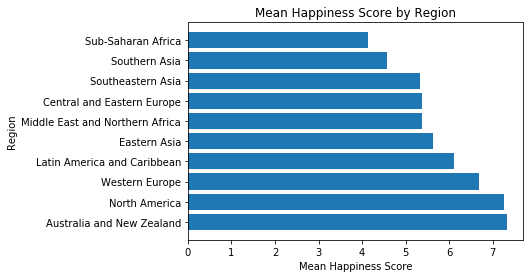

In [5]:
plt.barh(happines_for_region['Region'], happines_for_region['Happiness Score'])
plt.ylabel('Region')
plt.xlabel('Mean Happiness Score')
plt.title('Mean Happiness Score by Region')

#### Гипотезы:
Наибольший уровень счастья у регионов Австралии с Новой Зеландией и Северной Америки. Возможно небольшое количество стран в этом регионе дает определенное влияние на результат.

Удивительным оказалось более высокое положение Ближнего востока и Севреной Африки над Центральной и восточной Европой.

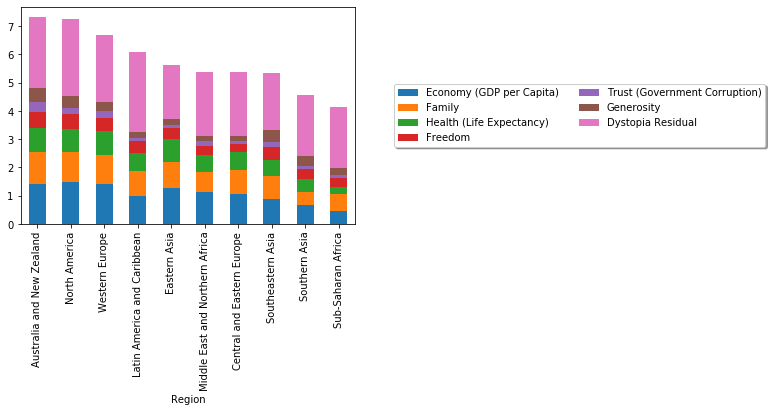

In [184]:
cumulate_plot = happines_for_region[['Region', 'Economy (GDP per Capita)', 'Family',
                                     'Health (Life Expectancy)', 'Freedom', 
                                     'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

cumulate_for_plot = cumulate_plot.set_index('Region')

cumulate_for_plot.plot(kind='bar', rot=90, stacked=True)\
    .legend(loc='center left', bbox_to_anchor=(1.1, 0.5), shadow=True, ncol=2)

#### Некоторые выводы:
Можно заметить, что хотя регион Латинская Америка и Карибы имеет неплохой общий рейтинг доверие к правительству у ние довольно низкое.

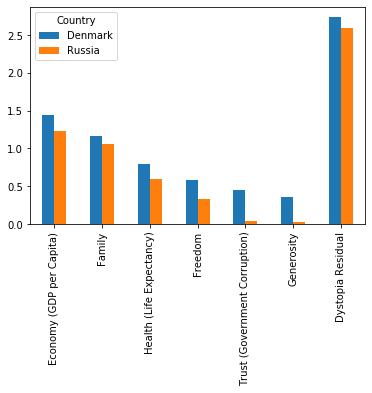

In [194]:
first_and_russia = data[ (data['Country']=='Denmark') | (data['Country']=='Russia') ]

first_and_russia.set_index('Country', inplace=True)

first_and_russia1 = first_and_russia.T

first_and_russia1.drop(['Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
                        'Upper Confidence Interval', 'Region'], inplace=True)
#first_and_russia1
first_and_russia1.plot(kind='bar')

#### Некоторые выводы:
Основной недобор России в рейтенге счастья по отношению к лидеру выходит из доверия к правительству, великодушия.

------  
*анализ с содедями по рейтингу отложен*

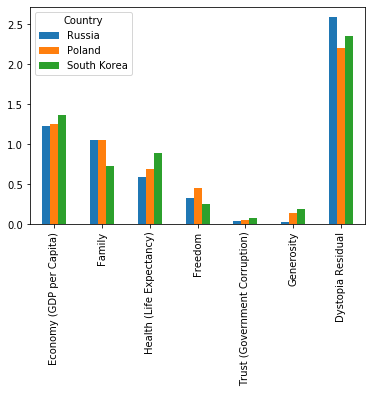

In [230]:
russia_and_neighbour = data.loc[data['Happiness Rank'].isin([56, 57])]

russia_and_neighbour.set_index('Country', inplace=True)

russia_and_neighbour1 = russia_and_neighbour.T

russia_and_neighbour1.drop(['Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
                        'Upper Confidence Interval', 'Region'], inplace=True)
russia_and_neighbour1
russia_and_neighbour1.plot(kind='bar')

-----

In [162]:
count_country = data[['Region', 'Freedom']].groupby('Region').count()
count_country.rename({'Freedom': 'Number of Country'}, axis='columns', inplace=True)
sort_countres = count_country.sort_values('Number of Country', ascending=True)
sort_countres.style.bar()

,Number of Country
Region,
Australia and New Zealand,2
North America,2
Eastern Asia,6
Southern Asia,7
Southeastern Asia,9
Middle East and Northern Africa,19
Western Europe,21
Latin America and Caribbean,24
Central and Eastern Europe,29


Количество стран в каждом из Регионов

In [8]:
import seaborn as sns

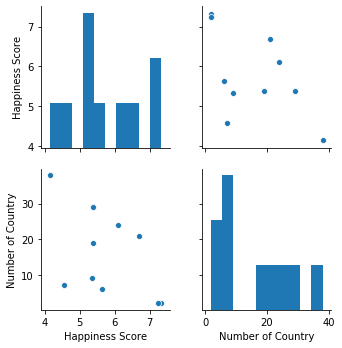

In [9]:
df_for_sns_plot = happines_for_region.merge(count_country, on='Region', how='left' )
         
sns_plot = sns.pairplot(df_for_sns_plot[['Happiness Score', 'Number of Country']])
sns_plot

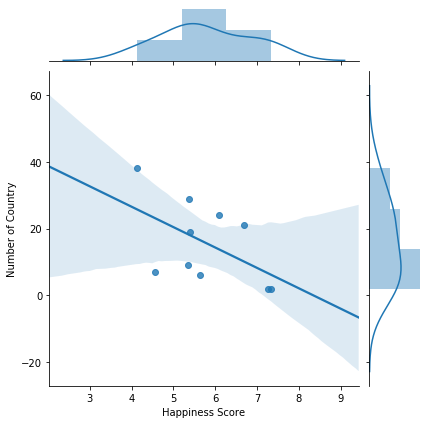

In [10]:
sns.jointplot(x='Happiness Score', y='Number of Country', 
              data=df_for_sns_plot, kind='reg')

#### Некоторые выводы:
Чем меньше стран в регионе, тем выше уровень счастья.  
- видимо со многими соседями сложнее договораиваться и уживаться.
- единое образование, которое объединяет территории повышает уровень счастья